# THEORY

## 1. What does “Data Cleansing” mean? What are the best ways to practice this?

Data cleansing, sometimes also referred to as data cleaning refers to data manipulations carried out before data analysis. It is a necessary step, as quality data will help teh analyst to produce a quality and informative output.
Majority of data work is usually spent cleaning and preparing a datset for analysis. The necessary data-cleaning steps will differ depending on teh dataset in question and palnned analyses. It can include: merging data sets, rebuilding or removing missing data and outliers, standardisation (e.g. standardising units and data types of a variable), nomralisation (organizing data such that it seems consistent across all records and fields), checking for duplicates and other anomalies (e.g. typos).

With data cleaning, as any data manipulation, it is important to document it a script (e.g. jupyter Notebook) and produce a reproducible code and worklflow. This improves transparency.

Data cleaning needs a lot of consideration. The analyst's input and reasoning for decision-making should also be documeneted. For example, what data was removed and why, what variables were removed or standardised/normalised and why.


## 2. What is the difference between data profiling and data mining?

<table style="width:100%; font-size: 110%;">
  <tr>
    <th style="text-align: center;">DATA MINING</th>
    <th style="text-align: center;">DATA PROFILING</th>
  </tr>
  <tr >
    <td style= "text-align: left;"> =looking for patterns in an available dataset ordatabase.It mines actionable information using mathematical algorithms and statistical analysis. </td>
    <td style= "text-align: left;"> = data analysis or exploration to evaluate the data itself or the metadata and assess the quality of the data set. The aim of data profiling is to discover anomalies in the dataset or database and correct those to ensure high data quality. </td>

  </tr>
  <tr>
    <td style= "text-align: left;">It is an analysis with the aim to turn raw data into new information,find trends and patterns and gain insight. It generates new non-trivial knowledge that ca be used for future data-driven decision-making. It typically involves a statistical and algorithmic analysis of a large data set. </td>
    <td style= "text-align: left;"> Data profiling is a process that evaluates data sets for consistency, uniqueness and logic while preparing it for subsequent cleansing, integration, and analysis. Data profiling is primarily concerned with the data quality,it identifies the wrong data at the initial stage of data cleaning and analysis so that it can be corrected at the right time. </td>

  </tr>
</table>

## 3. Define Outlier with an example.
Outlier is a data point which is very different from other observations/data points. Which observations are and are outliers and what to do with them is a subjective judgement. Researchers often consider data points that are more than 2-3 standard deviations from the variable mean to be outliers. Wecan check for outliers by looking at interquantile range, skewness (e.g. if we assume that a variable is normally distributed), or checking data visually with a boxplot, scatterplot, histogram, violin plot etc. It is usually a good idea to  use multiple techniques when checking outliers.  

Outliers can be problematic when building explanatory or predictive models, but so can be their removal. It isimportant to be transparent about what data and why have been removed and consider what it means for the model, its application, generalisability and its limitations. 

### Looking for outliers: example

#### visual examination: boxplot

The boxplot, as a default will visualise points that are xxx as outliers. In the plot below we can see that there appear to be 3 outliers.

In [2]:
from sklearn import datasets
from matplotlib.cbook import boxplot_stats  
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

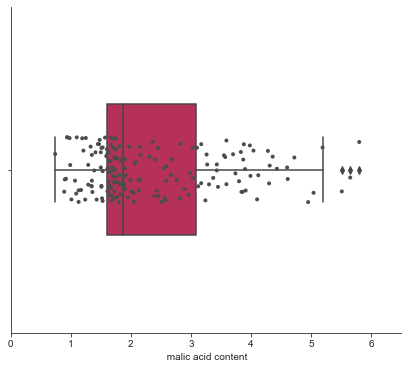

In [154]:
wine_data = pd.DataFrame(datasets.load_wine().data)
wine_data.columns = datasets.load_wine().feature_names

wine_data.head()


# Initialize the figure
f, ax = plt.subplots(figsize=(7, 6))


# Plot the orbital period with horizontal boxes
sns.boxplot(x="malic_acid", data=wine_data,
            width=.4, palette="rocket")

# Add in points to show each observation
sns.stripplot(x="malic_acid",  data=wine_data,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(xlim=(0, 6.5))
ax.set(xlabel=" malic acid content")
sns.despine(trim=False, left=False)

In [52]:
# boxplot outlier values

boxplot_stats(wine_data.malic_acid).pop(0)['fliers']

# we can then remove these if we choose to

array([5.8 , 5.51, 5.65])

### mean and sd

Only one case of wine which has malic acid content more than 3 standard deviations from the sample mean.

In [48]:
acid_mean = wine_data['malic_acid'].mean()
acid_std = wine_data['malic_acid'].std()
low = acid_mean -(3 * acid_std)
high = acid_mean + (3 * acid_std)

acid_outliers = wine_data[(wine_data['malic_acid'] < low) | (wine_data['malic_acid'] > high)]
acid_outliers

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
123,13.05,5.8,2.13,21.5,86.0,2.62,2.65,0.3,2.01,2.6,0.73,3.1,380.0


### IQR

 Using Interquantile range the data appears to have 3 outliers, see below.
 This output will be conssitent with a default outpot from a boxplot

In [66]:
# IQR
Q1 = np.percentile(wine_data['malic_acid'], 25,
                   interpolation = 'midpoint') # lowest 25%
 
Q3 = np.percentile(wine_data['malic_acid'], 75,
                   interpolation = 'midpoint') # highest 25%
IQR = Q3 - Q1 # interquantile range

# Upper bound
upper = Q3+1.5*IQR

# Lower bound
lower = Q1-1.5*IQR

# outliers (below lower bound or above upper bound)
outliers_iqr = wine_data[(wine_data['malic_acid'] < lower) | (wine_data['malic_acid'] > upper)]
outliers_iqr




,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515.0
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0


## 4. What is “Collaborative Filtering”?

**Collaborative filtering is a machine learning concept,useful when needing to generate recommendations.** 

- based on the idea that past preferences of somebody similar to you can predict your future preferences
- we classify users into the clusters of similar types, and recommend each user according to the preference of its cluster
- we can mathematically model similarities between users (using their ratings to create a vector) and build recommendations (predictions) based on teh angle between these vectors
- one of the metrics used is a **cosine similarity**: $cos(\theta)$
    - $\theta$ is the angle between the two vectors detremined by 2 users' ratings
    - this measure helps to then calculate a weighted average, based on users similarities - as a result the weight of ratings of users who are similar will be higher
    - more accurate measure than just a mean rating
    
**some issues**:
- scalability - issue when we have too much data (e.g. too many users)
- scarcity -missing data can be an issue
- balck sheep problem - users that are not similar to anybody
- grey sheepproblem - users that are equally similar to multiple clusters


## 5. What is “Time Series Analysis”?

Time series analysis is a type of analysis on data points recorded over a specified period of time (i.e. time-series data). The purpose of time series analysis is to discover trends and insights in the data, but also forecast future values. It is useful in field of economics and finance, health care, social sceince, environmental sceince and sales forecasting. Models of time series analysis include:

- Classification: Identifies and assigns categories to the data.
- Curve fitting: Plots the data along a curve to study the relationships of variables within the data.
- Descriptive analysis: Identifies patterns in time series data, like trends, cycles, or seasonal variation.
- Explanative analysis: Attempts to understand the data and the relationships within it, as well as cause and effect.
- Exploratory analysis: Highlights the main characteristics of the time series data, usually in a visual format.
- Forecasting: Predicts future data. This type is based on historical trends. It uses the historical data as a model for future data, predicting scenarios that could happen along future plot points.
- Intervention analysis: Studies how an event can change the data.
- Segmentation: Splits the data into segments to show the underlying properties of the source information.



## 6. Explain the core steps of a Data Analysis project?

1. **Identify Research Question**
- first we need to narrow our focus and clearly state what questions we want to answer with our analysis
1. **Source Data**
- sometimes we are given data, sometimes we need to source data for analysis. Thsi can be done open source datasets, APIs and web scraping, for example. It is a good idea to use multiple sources of data and carefully evaluate sources of the data - e.g. is the source comprehensive? complete? unbiased? These considerations should then feature when we interpret results from our data analysis
1. **Data cleaning**
- data must be cleaned to ensure quality output and reliable results
- this includes steps such as normalisation of data, identifiying outliers and dealing with missing data
2. **Data exploration**
- once data is cleaned we need to familiarise ourselves with variables and patterns, we can use descriptory statistics, such as mean, median, minimum and maximum. Wecan also create plots to get an idea about data distribution and potential relationships between variables. 
3. **Data analysis**
- data analysis is teh main step, however often less time-consuming than data cleaning
- data anlysis and teh steps taken will differ depending on the question and the dataset
- it will often involve building an explanatory or predictive model
4. **Data visualisation**
- we almost always need to visualise some aspects of the data analysis/ finsings or models during data analysis
- data visualisation can help us interpret data and share findings
4. **Interpretation of results and inference**
- our models need to be inetrpreted. What do the findings tell us, what does it mean? Have we answered the question we set at the beginning? 
- We should always consider limitations of our models/findings
    - what dataset it applies to?
    - can we generalise the findings?
    - is there any bias in our dataset or model?
    - what were the assumptions?
5. **Presentation**
- using data visualisation and models we usually have to share or present our finsings with the rest of the team, manager or other stakeholders. Presentation of the findings should be tailored to the audience.

## 7. What are the characteristics of a good data model?

_"All models are wrong, but some are useful."_
--George E. P. Box.
#### General features
- ... while it depends on context a good model, generally, should:
    - not be more complex than necessary
    - have a good explanatory and predictive power (avoid overfitting/underfitting)
    - fit the purpose (e.g. no need to train a neural network where linear regression would do the same job)
_______________________________________________________________________________________
#### Performance metrics
- different models can be evaluated in different ways using **performance metrics**
- the use of preformance metrics depends on the type of model we fitted
    - e.g. we coul use MSE (mean square error) for evaluating  linear regression model 
        <br> and precision or accuracy measure for a classification (logistic regression) model
    - other performance metrics include: 
    
        - Confusion Matrix
        - Area Under the ROC Curve (AUC)
        - F1 Score
        - Precision-Recall Curve
        - Log/Cross Entropy Loss
        - Mean Absolute Error
        
#### Context    
- other ways to evaluate a model aside from performance metrics mentioned above are:
    - prediction time (e.g.for example K-NN model will take a longer to make a prediction compared to a decision tree)
    - training time (e.g. neural networks will need a lot longer to train than a 
    - purpose (do we need speed? accuracy? generalisability?)
    - training volume (soem models need more data to train a good mdoel)
    - simplicity (if all else is equal, better model is the simpler one)
- the choice of a model and deciding whether a model is good depends on the purpose of the model, the requirements and generally the context of use

## 8. Explain and provide examples of univariate, bivariate, and multivariate analysis?

- **univariate analysis** is concerned with a single variable, univariate analysis can include entral tendency measures (mean, median and mode), dispersion or spread of data (range, minimum, maximum, quartiles, variance and standard deviation), distribution tables, histogram etc.

- **bivariate analysis** is concerned with a relationship between two variables,for example simple linear regression between an outcome and predictor variable would be an example of bivariate analysis

- **multivariate analysis** is analysis that involves three or more variables,Techniques are regression analysis,path analysis,factor analysis and multivariate analysis of variance (MANOVA).

### Example of Univariate analysis

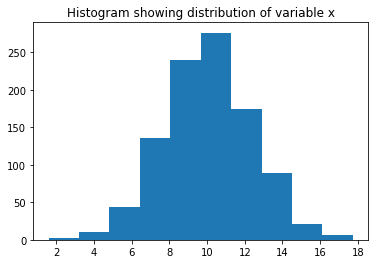

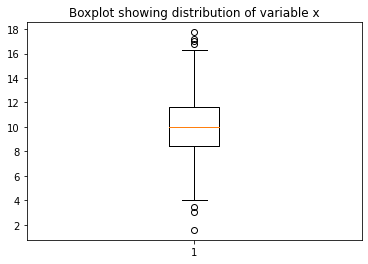

The variable x ranges between 1.58 and 17.74, the mean = 10.05, median = 10.02, sd = 2.35


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.random.normal(10, 2.4, 1000) # variable with 1000 datapoints, normal distribution, mean = 10, sd = 2.4, 

plt.hist(x)
plt.title('Histogram showing distribution of variable x')
plt.show()

plt.boxplot(x)
plt.title('Boxplot showing distribution of variable x')
plt.show()


print(f'The variable x ranges between {np.min(x):.2f} and {np.max(x):.2f}, the mean = {np.mean(x):.2f}, median = {np.median(x):.2f}, sd = {np.std(x):.2f}')


### Example of bivariate analysis

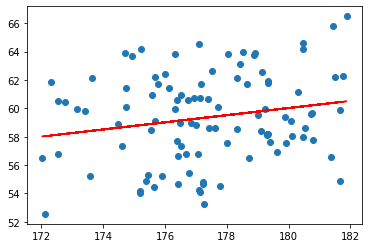

R^2 = 0.038491667913518324 
b0 = 14.663663629179652 
b1 = 0.25198492077562096


In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# generating two related variables (linear relationship)
x = np.random.normal(178, 2.4, 100)
y = []
for i in range(100):
    j = 12*np.random.rand()
    y.append(0.3*x[i] + j)

# relationship:linear regression
x= x.reshape(-1, 1)
model = LinearRegression().fit(x,y)

R_sq = model.score(x,y)
b0 = model.intercept_
b1 = model.coef_
    
# plotting
plt.scatter(x,y)
plt.plot(x,b0 + b1*x, color = 'red')
plt.show()



print(f'R^2 = {R_sq} \nb0 = {b0} \nb1 = {b1[0]}')
predictions= model.summary()      #summary of the model
predictions

### Example multivariate analysis

In [162]:
!pip install statsmodels

                            OLS Regression Results                            
Dep. Variable:             flavanoids   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     39.75
Date:                Tue, 03 May 2022   Prob (F-statistic):           5.87e-15
Time:                        19:57:51   Log-Likelihood:                -218.54
No. Observations:                 178   AIC:                             443.1
Df Residuals:                     175   BIC:                             452.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.9114      0.419     

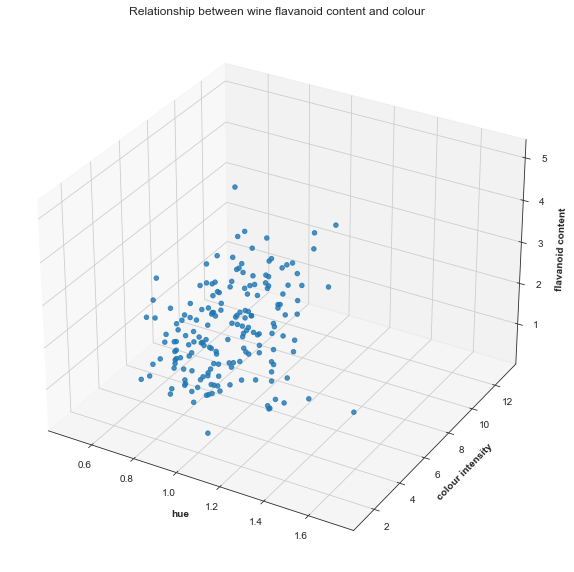

In [186]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

wine_data = pd.DataFrame(datasets.load_wine().data)
wine_data.columns = datasets.load_wine().feature_names

# multiple regression using the statsmodels package

results = smf.ols('flavanoids ~ hue + color_intensity', data=wine_data).fit() # fitting multiple regression model
print(results.summary())

#plot

fig = plt.figure(figsize = (20,10))
ax = plt.axes(projection ='3d')

   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

# defining axes
z = wine_data['flavanoids']
x = wine_data[['hue']]
y = wine_data[['color_intensity']]

ax.scatter(x, y, z,
          alpha = 0.8,
          marker ='o')
 
# syntax for plotting
ax.set_title('Relationship between wine flavanoid content and colour ')

ax.set_xlabel('hue', fontweight ='bold')
ax.set_ylabel('colour intensity', fontweight ='bold')
ax.set_zlabel('flavanoid content', fontweight ='bold')


plt.show()





## 9. What is a Linear Regression?

Linear regression is a statistical model which describes a simple relationship bbetween two or more variables. It allows us to predict outcome y from one or more predictors (xs). The most common method for fitting a regression line is the method of least-squares. This method calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the regression line. If there is one predictor we refre to the model as single linear regression, when teher are multiple predictors we talk about multiple linear regression.

The equation for linear regression is : 
$y = b_{0} + b_{1}*x_{1} + b_2*x_{2} + ... b_{n}*x_{n} + e$

where $y$ is the outcome, $x_{n}$ are the predictors, $b_{n}$ are the coefficients and $b_{0}$ is the intercept

Linear model has some important assumptions that we need to check before we interpret any results/ use the model for predictions. 

1. assumption of linearity:
The relationship between the variables can be described by a linear equation (also called additivity). i.e. we can fit a straight line to visualise the relationship between the variables.

2. assumption of independence:
The residuals are independent of each other

3. assumption  of equal variance 
the residuals have equal variance (also called homoskedasticity)

4. assumption of normality
The distribution of the **residuals** is normal

5. multicollinearity
If there are more than 1 predictors they should not be highly correlated

### Example of linear regression
#### Relationship between wine hue and flavanoid content

                            OLS Regression Results                            
Dep. Variable:             flavanoids   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     73.78
Date:                Tue, 03 May 2022   Prob (F-statistic):           4.55e-15
Time:                        19:38:37   Log-Likelihood:                -220.71
No. Observations:                 178   AIC:                             445.4
Df Residuals:                     176   BIC:                             451.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2447      0.272     -0.899      0.3

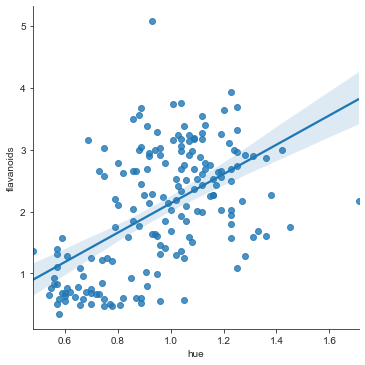

In [172]:
import seaborn as sns
# RQ association between flavanoids and color intensity

# Initialize the figure

sns.set_style('ticks')
sns.lmplot(x ='hue', y ='flavanoids', data = wine_data)

import statsmodels.api as sm
import statsmodels.formula.api as smf

wine_data = pd.DataFrame(datasets.load_wine().data)
wine_data.columns = datasets.load_wine().feature_names

# multiple regression using the statsmodels package

model = smf.ols('flavanoids ~ hue', data=wine_data).fit() # fitting multiple regression model
print(model.summary())


## 10. In terms of modelling data, what do we mean by Over-fitting and Under-fitting?

**Overfitting** and **Underfitting** are terms that are rela=evant to building predictive or explanatory models. This can be both in research and in machine learning. It often relates to polynomial regression type models or classification. 

- **overfitting** is when a model we built mistakes noise for data,, the model is extremely accurate when used with the training dataset, but  it is then inaccuarte when making predictions. Models that are too complex and have toomany features are prone to overfitting. 
- **underfitting** on the other hand mean that amodel was not able to recognise the patterns in the data, which can also result in inaccuracy. Underfitting often occurs when a model is too simple to capture the dependencies among the data.

For example if our data displays quadratic pattern, fitting a linear regression line would result in underfitting, while trying to fit a quartic regression line would result in overfitting.
To avoid these issues we need to, after fitting (and training our model) to test it with a test dataset and then validate it it with a validation data set to make sure that it performs well and is generalasibale.

Below are examples how could underfitting and overfitting look like.

In [53]:
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(2022)

x = np.linspace(0,10,11)
y = [0, 5,5.5,7,13.5,27,40,54, 60,75,105]


### good fit

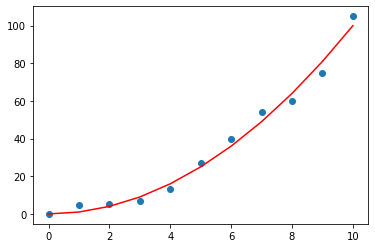

In [54]:
# fit a quadratic function

y_fit = x*x

plt.scatter(x,y)
plt.plot(x,y_fit, color= 'red')
plt.show()

## underfitting

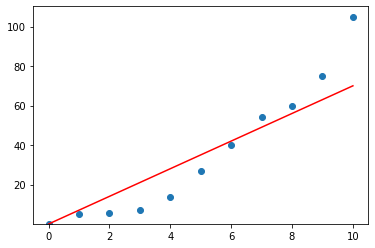

In [60]:
# fit a linear function

y_line = 7*x
plt.scatter(x,y)
plt.plot(x, y_line, color = 'red')
plt.ylim(0.100)

plt.show()

## overfitting

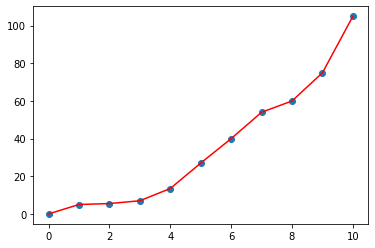

In [61]:
# fits every single point

y_over = y

plt.scatter(x,y_over)
plt.plot(x, y_over, color = 'red')

plt.show()

